# Artificial neural network with sigmoid
## --> This neural network consists of tanh activation in hidden layer and sigmoid in  output layer
## --> Artificial neural network with sigmoid in output layer is manually implemented in python
## --> ANN with sigmoid is used to classify sad or fear expression in face expression dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
% cd /content/drive/MyDrive/facial\ expression\ dataset

/content/drive/MyDrive/facial expression dataset


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
label = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
df.iloc[: , 0].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

# lets separate fear and sad data for our logistic regression

## 0 -> sad , 1 -> fear

In [ ]:
classifier = ["SAD" , "FEAR"]

In [ ]:
data = df[(df.iloc[: , 0]==2) | (df.iloc[: , 0]==4)]

In [ ]:
data.head()

,emotion,pixels
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [ ]:
data["classifier"] = (data.emotion == 2).astype(int)

In [ ]:
data.head()

,emotion,pixels,classifier
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,1
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,0
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,1
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,0
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,1


In [ ]:
Y = np.array(data.iloc[: , 2].astype(int))

In [ ]:
X = []
for i in range(len(data)):
  x = np.array(data.iloc[i][1].split()).astype(float)/ 255
  X.append(x)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(8927, 2304)

## lets visualize the data with label

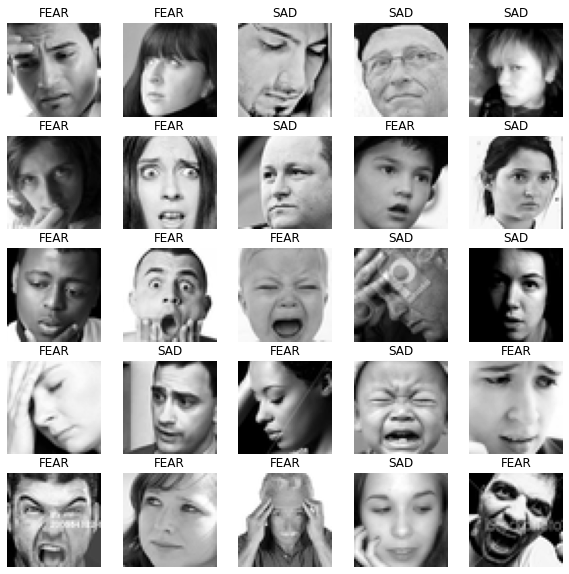

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(X[i+25].reshape((48 , 48)) ,  cmap = "gray")
  plt.title(classifier[Y[i+25]])
  plt.axis("off")

In [ ]:
np.unique(Y , return_counts= True)

(array([0, 1]), array([4830, 4097]))

In [ ]:
xtrain , xtest ,ytrain ,ytest = train_test_split(X ,Y)

In [ ]:
# lets write our own class for Artificial neural network with sigmoid in output layer

In [ ]:
class Ann_sigmoid:
    def __init__(self , hidden_units = 200):
        self.M = hidden_units
        self.W1 = None
        self.W2 = None


    @staticmethod
    def relu(x):
        return x*(x > 0)

    @staticmethod
    def sigmoid(x):
        return (1 / (1 + np.exp(-x)))

    @staticmethod
    def binary_cross_entropy(true_y , y):
        return (-np.sum(true_y*np.log(y)+ (1 - true_y)*np.log(1 - y)))
    
    def forward(self , x):
        z  = np.tanh(x.dot(self.W1))
        return z , self.sigmoid(z.dot(self.W2))

    def fit(self , input_x , true_y , learning_rate = 5e-7 , l1 = 0.1, epochs =10000 , show_cost_fig = True):
        N ,D = np.shape(input_x)

        x = np.concatenate((np.ones((N ,1)) , input_x) , axis = 1)

        K = len(set(true_y))

        if (self.W1 is None):
            self.W1 = np.random.randn(D+1 , self.M)
            self.W2 = np.random.randn(self.M)
        
        costs = []
        for i in range(epochs):
            # forward propagation
            Z , Y  = self.forward(x)

            # gradient descent
            y_t = Y - true_y
            self.W2 -= learning_rate*(Z.T.dot(y_t) + l1*self.W2)
            #dz = np.outer(y_t , self.W2.T)*(Z > 0)  #relu derivation
            dz = np.outer(y_t , self.W2.T)*(1 - Z*Z) #tanh
            self.W1 -= learning_rate*(x.T.dot(dz) + l1*self.W1)

            if (i%50 == 0):
                c = self.binary_cross_entropy(true_y , Y)
                costs.append([i , c])
                acc = self.accuracy(Y , true_y)
                print(f"epochs: {i} --- cross_entropy : {c} --- Accuracy : {acc}")
        
        if (show_cost_fig):
            costs  = np.array(costs)
            plt.plot(costs[: ,0] , costs[: ,1])

    def accuracy(self , y , true_y):
        return (np.mean(np.round(y)== true_y))

    def predict(self , x):
        x = np.concatenate((np.ones((len(x) ,1)) , x) , axis = 1)
        _ , y = self.forward(x)
        return np.round(y)

    def score(self , x , true_y):
        return np.mean(self.predict(x) == true_y)



In [ ]:
sig = Ann_sigmoid()

epochs: 0 --- cross_entropy : 4737.204411561337 --- Accuracy : 0.6152352501867066
epochs: 50 --- cross_entropy : 4735.139336866702 --- Accuracy : 0.6149365197908887
epochs: 100 --- cross_entropy : 4733.084200891304 --- Accuracy : 0.6147871545929798
epochs: 150 --- cross_entropy : 4731.038857435995 --- Accuracy : 0.6147871545929798
epochs: 200 --- cross_entropy : 4729.003158991194 --- Accuracy : 0.6147871545929798
epochs: 250 --- cross_entropy : 4726.976956572718 --- Accuracy : 0.6152352501867066
epochs: 300 --- cross_entropy : 4724.960099606662 --- Accuracy : 0.6150858849887976
epochs: 350 --- cross_entropy : 4722.952435880978 --- Accuracy : 0.6152352501867066
epochs: 400 --- cross_entropy : 4720.9538115862015 --- Accuracy : 0.6155339805825243
epochs: 450 --- cross_entropy : 4718.964071473285 --- Accuracy : 0.6153846153846154
epochs: 500 --- cross_entropy : 4716.983059162715 --- Accuracy : 0.6155339805825243
epochs: 550 --- cross_entropy : 4715.0106176458585 --- Accuracy : 0.6155339805

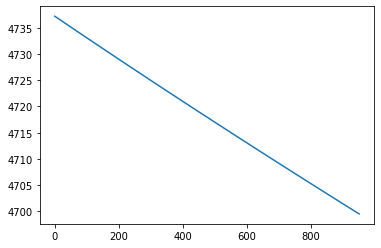

In [ ]:
sig.fit(xtrain ,ytrain , epochs= 1000)

In [ ]:
sig.score(xtrain , ytrain)

0.6159820761762509

In [ ]:
sig.score(xtest , ytest)

0.5327060931899642

In [ ]:
pred = sig.predict(xtest)

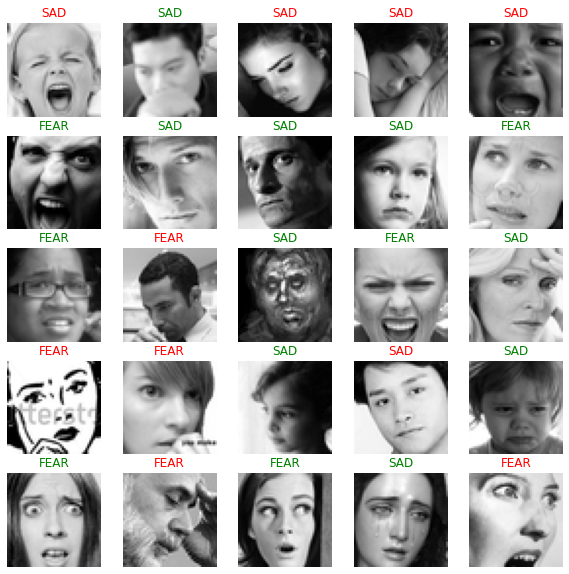

In [ ]:
plt.figure(figsize = (10,10))
for i in range (25):
    c = "red"
    if (ytest[i] == pred[i]):
        c = "green"
    ax = plt.subplot(5,5,i+1)
    plt.imshow(xtest[i].reshape((48 , 48)) ,  cmap = "gray")
    plt.title(classifier[ytest[i]] , color = c)
    plt.axis("off")

# If we do some hyperparameter optimization and run it for more number epochs we could improve accuracy